In [35]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

### Load, explore and pre-process data

In [2]:
from sklearn.datasets import load_digits

digits_df = pd.DataFrame(load_digits().data)

digits_df['target'] = load_digits().target

In [3]:
digits_df.shape

(1797, 65)

In [4]:
digits_df.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


This process can be very long on low-end machines. In such a case,
limit the number of samples to 20 or 30.

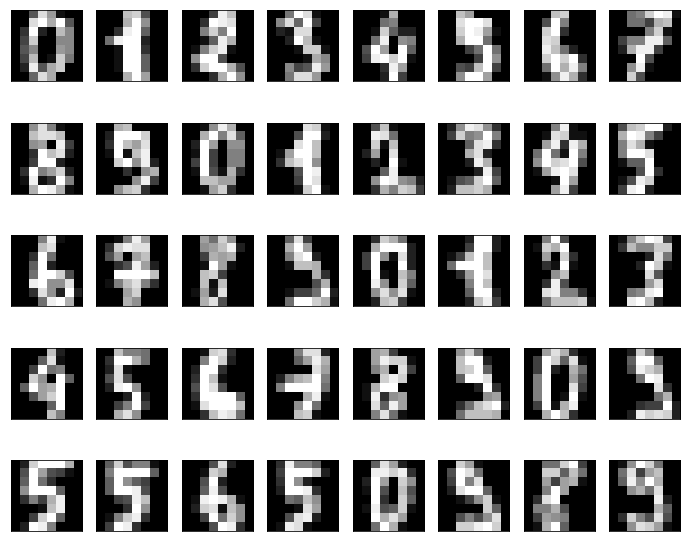

In [5]:
fig = plt.figure(figsize = (12, 10))  

for i in range(40):
    
    ax = fig.add_subplot(5, 8, i + 1, xticks = [], yticks = [])
    ax.imshow(load_digits().data[i].reshape(8, 8), cmap = 'gray',interpolation = 'nearest')

In [6]:
X = digits_df.drop('target', axis = 1)
Y = digits_df['target']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [7]:
x_train.shape, y_train.shape

((1437, 64), (1437,))

In [8]:
x_test.shape, y_test.shape

((360, 64), (360,))

### Build stand-alone classification model

In [9]:
classifier = LogisticRegression(solver = 'saga', multi_class = 'multinomial', max_iter=10000)

In [10]:
classifier.fit(x_train, y_train) 

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=10000, multi_class='multinomial',
          n_jobs=None, penalty='l2', random_state=None, solver='saga',
          tol=0.0001, verbose=0, warm_start=False)

In [11]:
y_pred = classifier.predict(x_test)

In [12]:
pred_results = pd.DataFrame({'y_test': y_test,
                             'y_pred': y_pred})

In [13]:
pred_results.sample(10)

,y_test,y_pred
1421,6,6
1583,8,8
1724,2,2
519,3,9
1691,4,4
248,8,8
1047,8,8
1140,2,2
193,3,3
1485,1,1


In [14]:
digits_crosstab = pd.crosstab(pred_results.y_pred, pred_results.y_test)

digits_crosstab

y_test,0,1,2,3,4,5,6,7,8,9
y_pred,,,,,,,,,,
0,38,0,0,0,0,0,0,0,0,0
1,0,39,0,0,0,1,1,0,0,1
2,0,0,40,0,0,0,0,0,0,0
3,0,0,0,25,0,0,0,0,0,0
4,0,0,0,0,39,0,0,0,0,0
5,0,0,0,1,0,40,0,0,1,0
6,0,0,0,0,0,0,34,0,0,0
7,0,0,0,0,0,0,0,36,0,0
8,0,1,0,1,1,0,0,0,30,3


### Precision-recall scores

When we use these for multiclass classification we need to specify an averaging method to determine how the precision and recall scores for different labels should be weighted

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html

In [15]:
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print("accuracy_score : ", acc)
print("precision_score : ", prec)
print("recall_score : ", recall)

accuracy_score :  0.9638888888888889
precision_score :  0.9658730158730158
recall_score :  0.9638888888888889


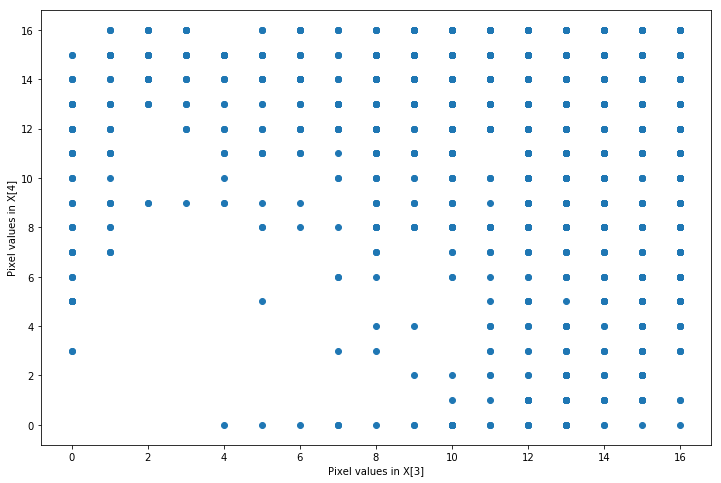

In [16]:
figure = plt.figure(figsize = (12, 8))

plt.scatter(X[3], X[4], cmap = 'Spectral')
plt.xlabel('Pixel values in X[3]')
plt.ylabel('Pixel values in X[4]');

### Perform KMeans Clustering
* n_clusters : The number of clusters to form as well as the number of centroids to generate.
* fit_predict : Compute cluster centers and predict cluster index for each sample.
* cluster_centers_ : Coordinates of cluster centers.

In [17]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 10, n_init = 500, max_iter = 4000, random_state = 0)

In [18]:
clusters = kmeans.fit_predict(X) 

In [19]:
kmeans.cluster_centers_.shape

(10, 64)

In [20]:
X.shape

(1797, 64)

In [21]:
X_new = kmeans.transform(X) 

In [22]:
X_new.shape

(1797, 10)

In [23]:
X_new = pd.DataFrame(X_new)

X_new.head()

,0,1,2,3,4,5,6,7,8,9
0,46.350691,42.280133,41.742849,39.157789,40.685712,39.517846,44.735492,32.260940,14.002706,46.354852
1,38.334827,39.801414,44.373336,43.503530,39.336003,41.248628,25.279648,44.372077,54.076429,35.995643
2,40.229032,41.132772,43.335309,45.749389,44.091158,50.349395,31.080787,45.519250,47.752128,39.728085
3,32.669299,44.880478,41.767456,22.636003,48.947590,39.576246,39.040088,29.388426,44.162762,42.807248
4,52.647235,48.280432,40.173984,51.424493,28.283519,50.042842,42.819277,48.412814,45.605275,39.683401


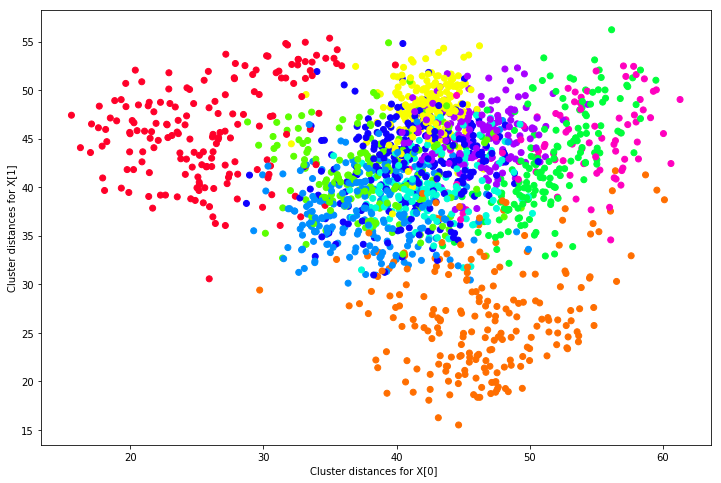

In [24]:
plt.figure(figsize = (12, 8))

plt.scatter(X_new[0], X_new[1], c = clusters, cmap='gist_rainbow')

plt.xlabel('Cluster distances for X[0] ')
plt.ylabel('Cluster distances for X[1]');

In [25]:
x_train, x_test, y_train, y_test = train_test_split(X_new, Y, test_size=0.2)

In [26]:
x_train.shape, y_train.shape

((1437, 10), (1437,))

In [27]:
x_test.shape, y_test.shape

((360, 10), (360,))

### Stack Model

In [28]:
classifier = LogisticRegression(solver = 'saga', multi_class = 'multinomial', max_iter=10000)

In [29]:
classifier.fit(x_train, y_train) 

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=10000, multi_class='multinomial',
          n_jobs=None, penalty='l2', random_state=None, solver='saga',
          tol=0.0001, verbose=0, warm_start=False)

In [30]:
y_pred = classifier.predict(x_test)

In [31]:
pred_results = pd.DataFrame({'y_test': y_test,
                             'y_pred': y_pred})

In [32]:
pred_results.sample(10)

,y_test,y_pred
1788,4,4
720,5,5
1495,1,9
760,8,8
1096,9,9
1124,4,4
1416,1,1
399,3,3
541,5,5
209,0,0


In [33]:
digits_crosstab = pd.crosstab(pred_results.y_pred, pred_results.y_test)

digits_crosstab

y_test,0,1,2,3,4,5,6,7,8,9
y_pred,,,,,,,,,,
0,32,0,0,0,0,0,0,0,0,0
1,0,34,0,0,1,0,0,0,4,0
2,0,0,37,1,0,0,0,0,0,0
3,0,0,0,26,0,0,0,0,0,0
4,0,0,0,0,44,0,0,1,0,1
5,0,0,0,1,0,35,0,0,1,0
6,1,0,0,0,0,0,36,0,0,0
7,0,0,1,1,1,0,0,38,0,0
8,0,4,0,1,1,0,0,1,23,1


In [34]:
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print("accuracy_score : ", acc)
print("precision_score : ", prec)
print("recall_score : ", recall)

accuracy_score :  0.9194444444444444
precision_score :  0.9227880741264588
recall_score :  0.9194444444444444
